In [1]:
import geowombat as gw
from geowombat.data import rgbn

with gw.open(rgbn) as src:
    print(src.transform)
    print(src.gw.transform)
    print(src.crs)
    print(src.resampling)
    print(src.res)
    print(src.gw.cellx, src.gw.celly)

(5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
(5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
32618
nearest
(5.0, 5.0)
5.0 5.0


(5.0, 0.0, 2502400.7632678417, 0.0, -5.0, -2147313.7330151177)
+proj=aea +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs +type=crs
nearest
(5.0, 5.0)


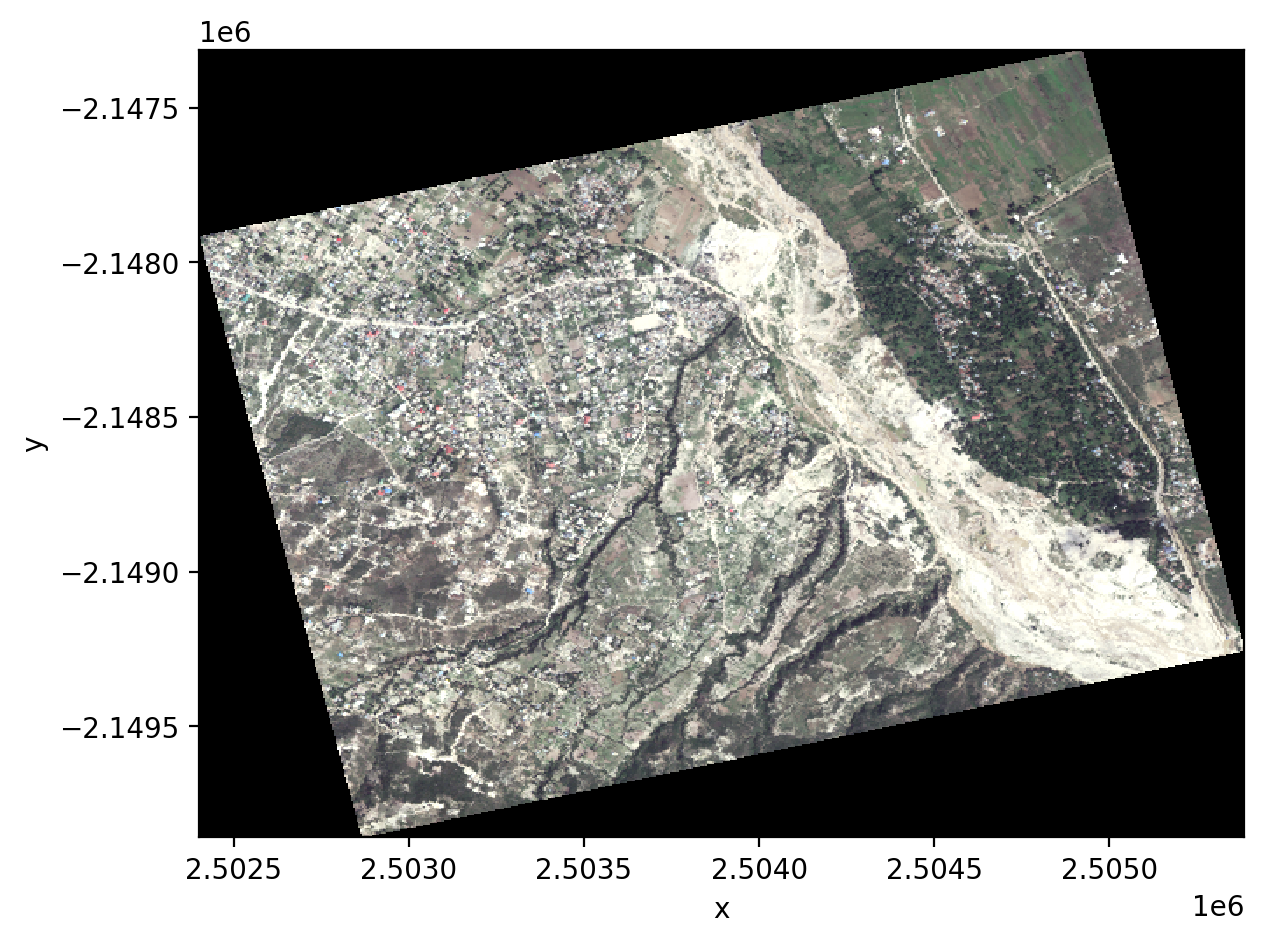

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=200)

proj4 = "+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"

with gw.config.update(ref_crs=proj4):
    with gw.open(rgbn, nodata=0) as src:
        print(src.transform)
        print(src.crs)
        print(src.resampling)
        print(src.res)
        src.sel(band=[3,2,1]).plot.imshow(robust=True, ax=ax)

plt.tight_layout(pad=1)

In [3]:
with gw.config.update(ref_crs=proj4):
    with gw.open(rgbn) as src:
        print(src.transform)
        print(src.crs)
        print(src.resampling)
        print(src.res)

(5.0, 0.0, 2502400.7632678417, 0.0, -5.0, -2147313.7330151177)
+proj=aea +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs +type=crs
nearest
(5.0, 5.0)


In [4]:
with gw.config.update(ref_crs=31972):
    with gw.open(rgbn, resampling='cubic') as src:
        print(src.transform)
        print(src.crs)
        print(src.resampling)
        print(src.res)

(5.0, 0.0, 792988.0000004865, 0.0, -5.0, 2050381.9999358936)
31972
cubic
(5.0, 5.0)


In [5]:
with gw.config.update(ref_crs=31972, ref_res=(10, 10)):
    with gw.open(rgbn, resampling='cubic') as src:
        print(src.transform)
        print(src.crs)
        print(src.resampling)
        print(src.res)

(10.0, 0.0, 792988.0000004865, 0.0, -10.0, 2050381.9999358936)
31972
cubic
(10.0, 10.0)


In [6]:
with gw.open(rgbn) as src:
    print(src.transform)
    print(src.crs)
    print(src.resampling)
    print(src.res)
    print('')
    src_tr = src.gw.transform_crs(proj4, dst_res=(10, 10), resampling='bilinear')
    print(src_tr.transform)
    print(src_tr.crs)
    print(src_tr.resampling)
    print(src_tr.res)

(5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
32618
nearest
(5.0, 5.0)



(10.0, 0.0, 2502400.7632678417, 0.0, -10.0, -2147313.7330151177)
+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs +type=crs
bilinear
(10, 10)


In [7]:
with gw.open(rgbn, resampling='cubic') as src:
    print(help(src.gw.transform_crs))

Help on method transform_crs in module geowombat.core.geoxarray:

transform_crs(dst_crs=None, dst_res=None, dst_width=None, dst_height=None, dst_bounds=None, src_nodata=None, dst_nodata=None, coords_only=False, resampling='nearest', warp_mem_limit=512, num_threads=1) method of geowombat.core.geoxarray.GeoWombatAccessor instance
    Transforms a DataArray to a new coordinate reference system.
    
    Args:
        dst_crs (Optional[CRS | int | dict | str]): The destination CRS.
        dst_res (Optional[tuple]): The destination resolution.
        dst_width (Optional[int]): The destination width. Cannot be used with ``dst_res``.
        dst_height (Optional[int]): The destination height. Cannot be used with ``dst_res``.
        dst_bounds (Optional[BoundingBox | tuple]): The destination bounds, as a ``rasterio.coords.BoundingBox``
            or as a tuple of (left, bottom, right, top).
        src_nodata (Optional[int | float]): The source nodata value. Pixels with this value will not